In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [12]:
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0
14245,8,PAYMENT,11465.21,C1837637612,38.0,0.00,M1222093409,0.0,0.0,0.0,0.0


In [14]:
df.columns
df.drop([ 'isFlaggedFraud'],axis = 1, inplace = True)

About Dataset

In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [16]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0
14245,8,PAYMENT,11465.21,C1837637612,38.0,0.00,M1222093409,0.0,0.0,0.0
14246,8,CASH_OUT,71154.12,C,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [18]:
#checking for correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.040947,-0.065173,-0.065322,-0.005285,0.033043,-0.024286
amount,0.040947,1.000000,0.092782,0.062145,0.362895,0.459616,0.133739
oldbalanceOrg,-0.065173,0.092782,1.000000,0.996683,0.196803,0.148137,-0.005359
newbalanceOrig,-0.065322,0.062145,0.996683,1.000000,0.203862,0.150776,-0.027849
oldbalanceDest,-0.005285,0.362895,0.196803,0.203862,1.000000,0.908342,-0.018103
newbalanceDest,0.033043,0.459616,0.148137,0.150776,0.908342,1.000000,-0.009828
isFraud,-0.024286,0.133739,-0.005359,-0.027849,-0.018103,-0.009828,1.000000


HeatMap

<Axes: >

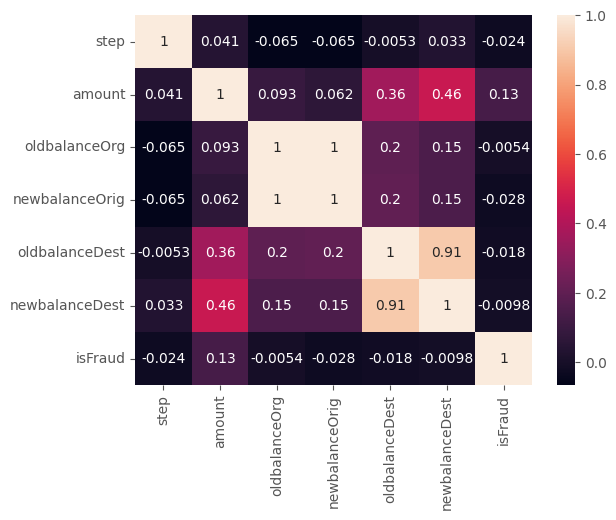

In [19]:
sns.heatmap(df.corr(),annot=True)

Univariate analysis

<Axes: xlabel='step', ylabel='Count'>

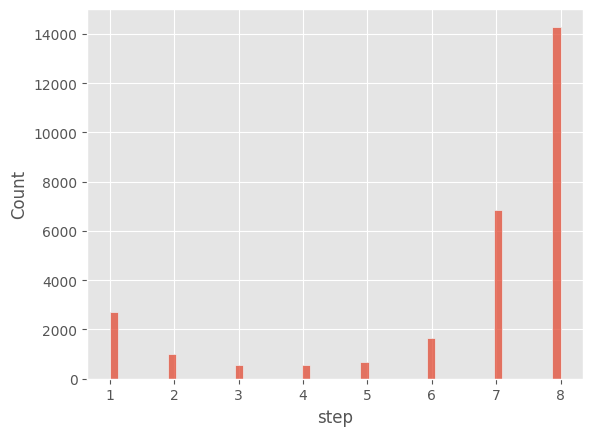

In [ ]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

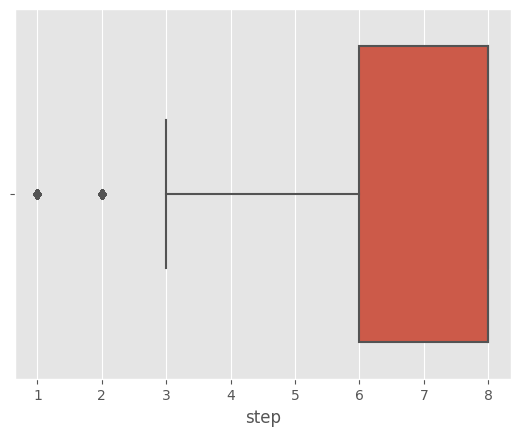

In [ ]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

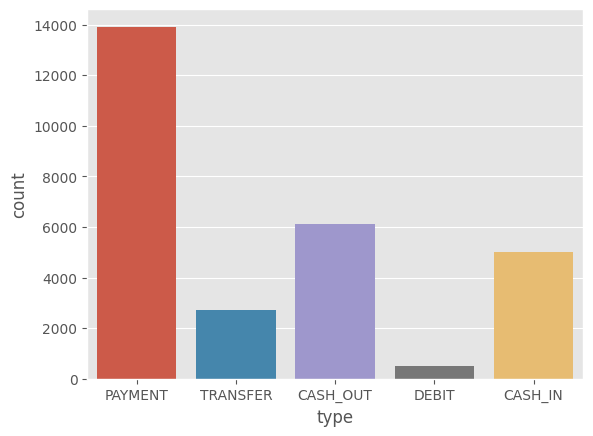

In [ ]:
#type
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

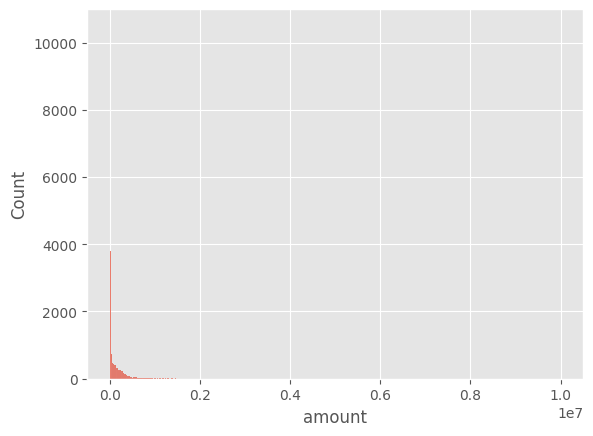

In [ ]:
#amount
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

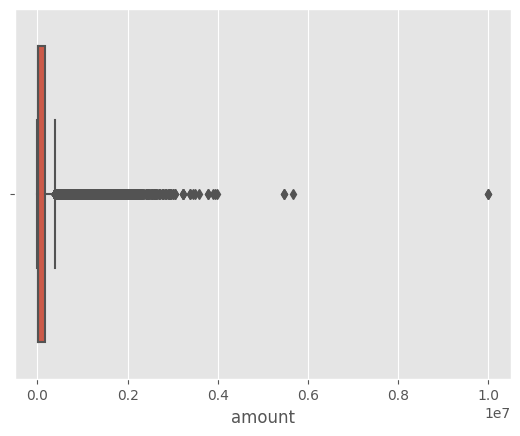

In [ ]:
sns.boxplot(data=df,x="amount")

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

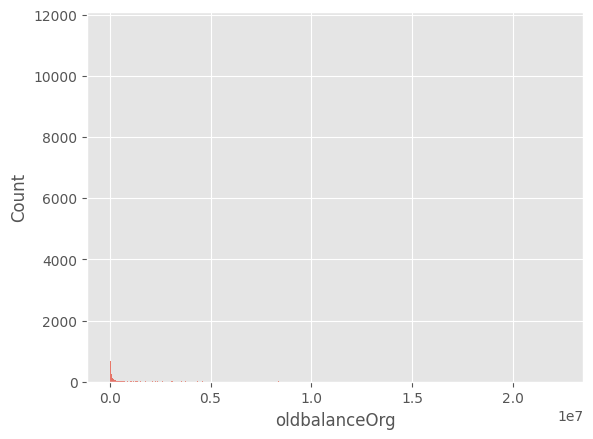

In [ ]:
#oldbalanceOrg
sns.histplot(data=df,x="oldbalanceOrg")

In [20]:
#nameDest
df['nameDest'].value_counts()

C985934102     64
C1590550415    54
C1286084959    53
C977993101     48
C248609774     47
               ..
M1322359657     1
M492135521      1
M2009885224     1
M1913425792     1
M1222093409     1
Name: nameDest, Length: 9472, dtype: int64

<Axes: xlabel='oldbalanceDest'>

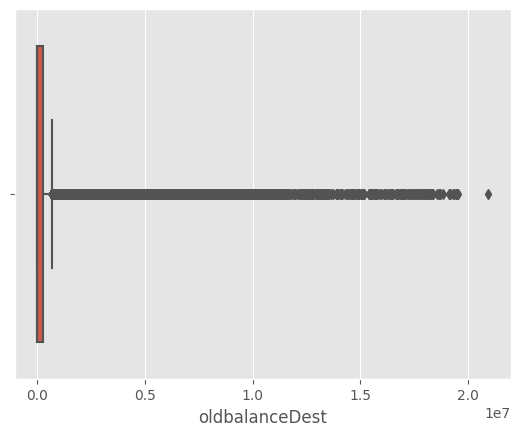

In [21]:
#oldbalanceDest
sns.boxplot(data=df,x="oldbalanceDest")

<Axes: xlabel='newbalanceDest'>

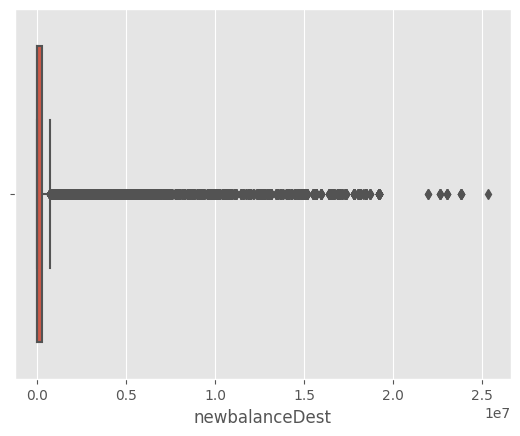

In [22]:
#newbalanceDest
sns.boxplot(data=df,x="newbalanceDest")

<Axes: xlabel='isFraud', ylabel='count'>

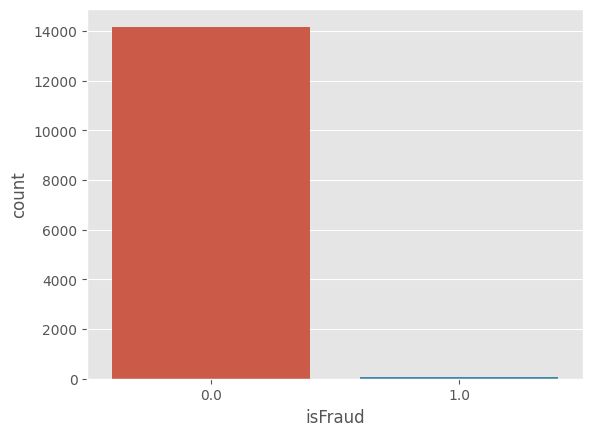

In [23]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [24]:
df['isFraud'].value_counts()

0.0    14168
1.0       78
Name: isFraud, dtype: int64

In [25]:
df.loc[df['isFraud']==0, 'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1, 'isFraud'] = 'is Fraud'

In [26]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,is not Fraud
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,is not Fraud
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,is not Fraud
14245,8,PAYMENT,11465.21,C1837637612,38.0,0.00,M1222093409,0.0,0.0,is not Fraud


Bivariate analysis

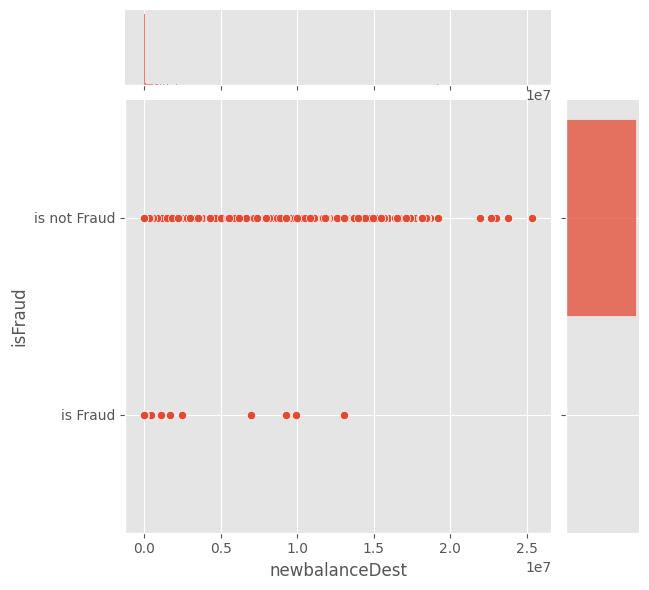

In [27]:
sns.jointplot(data=df,x="newbalanceDest",y="isFraud")

<Axes: xlabel='type', ylabel='count'>

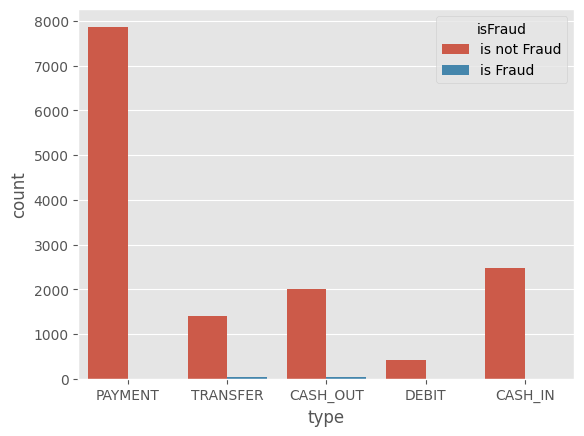

In [28]:
sns.countplot(data=df,x="type",hue="isFraud")

<Axes: xlabel='isFraud', ylabel='step'>

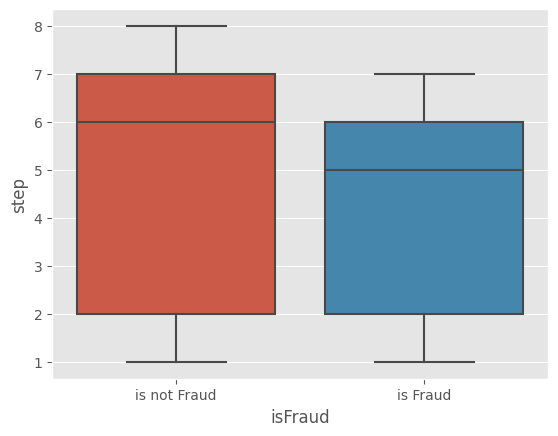

In [29]:
sns.boxplot(data=df,x="isFraud",y="step")

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

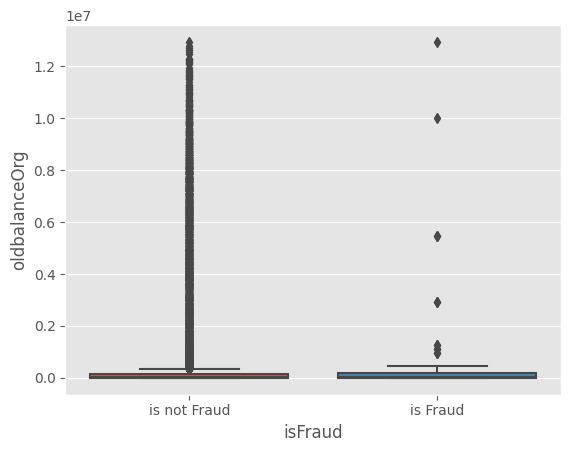

In [30]:
sns.boxplot(data=df,x="isFraud",y="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

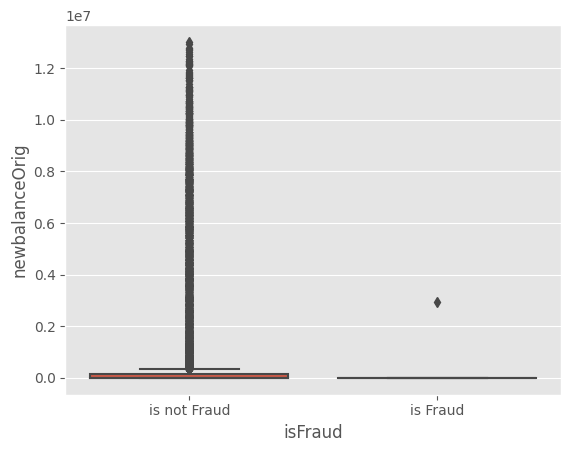

In [31]:
sns.boxplot(data=df,x="isFraud",y="newbalanceOrig")

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

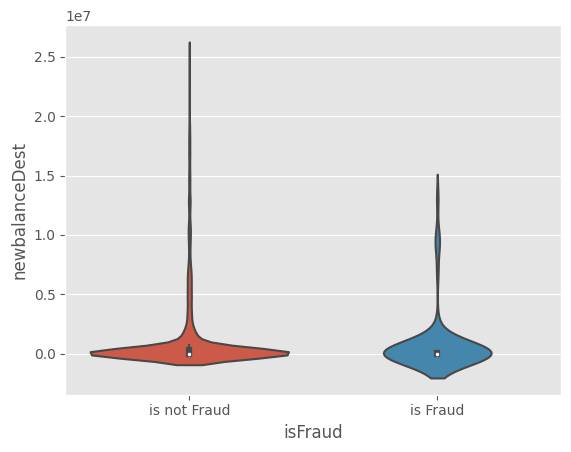

In [32]:
sns.violinplot(data=df,x="isFraud",y="newbalanceDest")

In [33]:
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,14247.000000,14247,1.424700e+04,14247,1.424600e+04,1.424600e+04,14246,1.424600e+04,1.424600e+04,14246
unique,NaN,5,NaN,14247,NaN,NaN,9472,NaN,NaN,2
top,NaN,PAYMENT,NaN,C1231006815,NaN,NaN,C985934102,NaN,NaN,is not Fraud
freq,NaN,7869,NaN,1,NaN,NaN,64,NaN,NaN,14168
mean,5.037131,NaN,1.118848e+05,NaN,7.937369e+05,8.107136e+05,NaN,8.411336e+05,1.147629e+06,NaN
std,2.463112,NaN,2.805152e+05,NaN,2.016693e+06,2.059984e+06,NaN,2.528174e+06,3.151706e+06,NaN
min,1.000000,NaN,2.390000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,2.000000,NaN,4.585130e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,6.000000,NaN,1.286936e+04,NaN,2.041500e+04,8.216325e+03,NaN,0.000000e+00,0.000000e+00,NaN
75%,7.000000,NaN,1.218917e+05,NaN,1.384956e+05,1.294173e+05,NaN,2.641427e+05,2.775150e+05,NaN


Data Pre-processing

In [34]:
# Shape of csv data
df.shape

(14247, 10)

In [35]:
df.drop(['nameOrig', 'nameDest'], axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [36]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


Checking for null values

In [37]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     1
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

In [38]:
df=df.dropna()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14246 entries, 0 to 14245
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14246 non-null  int64  
 1   type            14246 non-null  object 
 2   amount          14246 non-null  float64
 3   oldbalanceOrg   14246 non-null  float64
 4   newbalanceOrig  14246 non-null  float64
 5   oldbalanceDest  14246 non-null  float64
 6   newbalanceDest  14246 non-null  float64
 7   isFraud         14246 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1001.7+ KB


Handling Outliers

<Axes: >

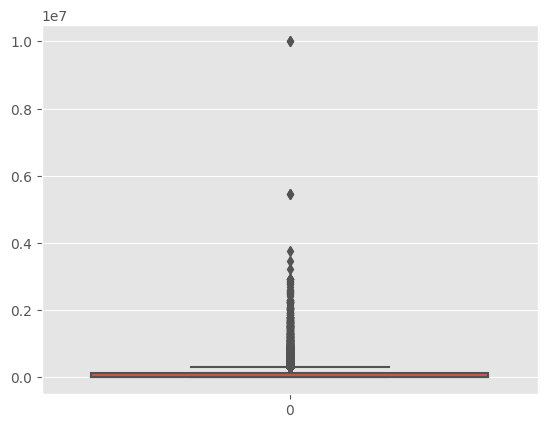

In [40]:
sns.boxplot(df['amount'])

Remove the Outliers

In [41]:
from scipy import stats
print(stats.mode(df[ 'amount']))
print(np.mean(df['amount']))

ModeResult(mode=25975.86, count=3)
111887.69713112451


In [42]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)
IQR = q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 : 4584.905000000001
q3 : 121894.6225
IQR : 117309.7175
Upper Bound : 297859.19875
Lower Bound : -171379.67124999998
Skewed data : 1475
Skewed data : 0


In [43]:
# To handle outliers transformation techniques are used.
def transformationPlot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)
  plt.subplot(1,2,2)
  stats.probplot(feature,plot=plt)

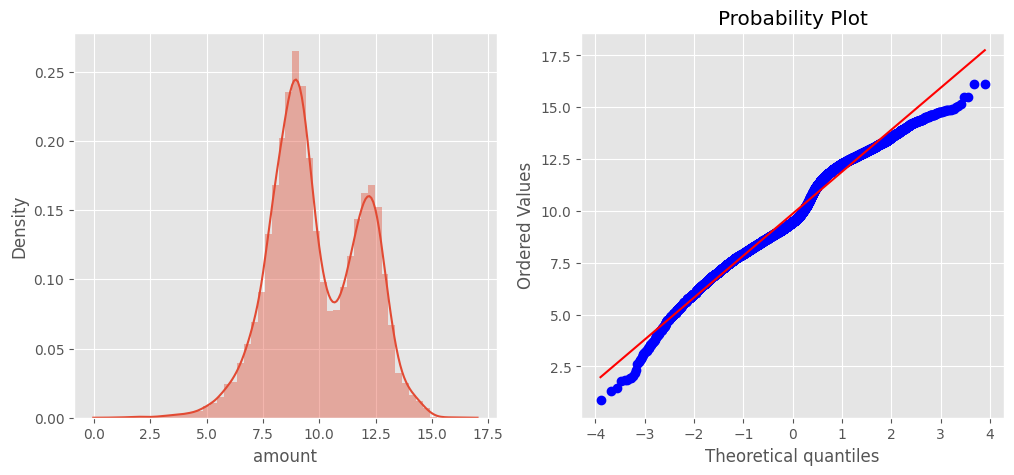

In [44]:
transformationPlot(np.log(df['amount']))

Object data labelencoding

In [45]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [46]:
df[ "type" ].value_counts()

3    7869
0    2472
1    2054
4    1438
2     413
Name: type, dtype: int64

dividing the dataset into dependent and independent y and x respectively

In [47]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [48]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0
...,...,...,...,...,...,...,...
14241,8,3,35108.12,0.0,0.00,0.0,0.0
14242,8,3,20924.47,18265.0,0.00,0.0,0.0
14243,8,1,75244.54,38369.0,0.00,167.0,0.0
14244,8,3,3074.36,10242.0,7167.64,0.0,0.0


In [49]:
y

0        is not Fraud
1        is not Fraud
2            is Fraud
3            is Fraud
4        is not Fraud
             ...     
14241    is not Fraud
14242    is not Fraud
14243    is not Fraud
14244    is not Fraud
14245    is not Fraud
Name: isFraud, Length: 14246, dtype: object

Splitting data into train and test

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(11396, 7)
(2850, 7)
(2850,)
(11396,)


Model Building

Random Forest classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9975438596491228

In [53]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [54]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,8,7
is not Fraud,0,2835


In [55]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       1.00      0.53      0.70        15
is not Fraud       1.00      1.00      1.00      2835

    accuracy                           1.00      2850
   macro avg       1.00      0.77      0.85      2850
weighted avg       1.00      1.00      1.00      2850



Decision tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9975438596491228

In [57]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [58]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,9,6
is not Fraud,1,2834


In [59]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.90      0.60      0.72        15
is not Fraud       1.00      1.00      1.00      2835

    accuracy                           1.00      2850
   macro avg       0.95      0.80      0.86      2850
weighted avg       1.00      1.00      1.00      2850



ExtraTrees Classifier

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

0.9968421052631579

In [61]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [62]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,6,9
is not Fraud,0,2835


In [63]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       1.00      0.40      0.57        15
is not Fraud       1.00      1.00      1.00      2835

    accuracy                           1.00      2850
   macro avg       1.00      0.70      0.78      2850
weighted avg       1.00      1.00      1.00      2850



SupportVectorMachine Classifier

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9947368421052631

In [65]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9949104949104949

In [66]:
pd.crosstab(y_test,y_test_predict4)

col_0,is not Fraud
isFraud,
is Fraud,15
is not Fraud,2835


In [67]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.00      0.00      0.00        15
is not Fraud       0.99      1.00      1.00      2835

    accuracy                           0.99      2850
   macro avg       0.50      0.50      0.50      2850
weighted avg       0.99      0.99      0.99      2850



In [68]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [70]:
y_test1=la.transform(y_test)

In [71]:
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

xgboost Classifier

In [75]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)
y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9975438596491228

In [76]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

1.0

In [78]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,9,6
1,1,2834


In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       1.00      1.00      1.00      2835

    accuracy                           1.00      2850
   macro avg       0.95      0.80      0.86      2850
weighted avg       1.00      1.00      1.00      2850



In [84]:
def compareModel():
  print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
  print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
  print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
  print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
  print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
  print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
  print("train accuracy for svc",accuracy_score(y_train_predict4,y_train))
  print("test accuracy for svc",accuracy_score(y_test_predict4,y_test))
  print("train accuracy for xgbl",accuracy_score(y_train_predict5,y_train1))
  print("test accuracy for xgbl",accuracy_score(y_test_predict5,y_test1))

In [85]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9975438596491228
train accuracy for dtc 1.0
test accuracy for dtc 0.9975438596491228
train accuracy for etc 1.0
test accuracy for etc 0.9968421052631579
train accuracy for svc 0.9949104949104949
test accuracy for svc 0.9947368421052631
train accuracy for xgbl 1.0
test accuracy for xgbl 0.9975438596491228


Evaluating performance of the model and saving the model

In [86]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9947368421052631

In [87]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9949104949104949

In [88]:
import pickle
pickle.dump(svc,open("payments.pkl", "wb"))